# Introduction

## Objective

Detailed Introduction to your project, e.g. what problem you are going to solve based on what dataset

Possible Problem:
Finding optimal number of hours for quality sleep and debunking myths of alcohol and smoking affecting sleep using data

## Significance
- briefly review the significance of your topic, e.g. any potential applciations of your project

## Organisation
### - Data Prepocessing
    - Import Libraries
    - Import Data Set
    - About Data Set
### - Relationship between gender and age to sleep efficiency
### - Sleep Percentages
    - Relationships between Sleep Duration and Sleep Percentages
    - Relationships between Sleep Efficiency and Sleep Percentages
### - Sleep Quality
    - Relationship of lifestyle choices(bed time,sleep duration,exercise,caffeine,alcohol,smoke) to sleep quality(3 factors)
### - Multivariate Regression Model
    - Choosing Relevant factors
    - Train a model to determine an average recommended sleep duration

## Importing Libraries

In [2]:
# Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Importing Data Set

In [3]:
dataset = pd.read_csv('Sleep_Efficiency.csv')
dataset.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


## About Data Set
#### The dataset contains information about a group of test subjects and their sleep patterns. 

Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded. The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency. For more information, read 'data_description.txt'.

## Checkpoint 2. Data Preprocessing
Detailed description on your dataset via statistics and visualization.
Detailed statements on why and how you perform data preprocessing, e.g. data cleaning, normalization, transformation, data augmentation.

### Renaming Column Headers

In [4]:
dataset = dataset.rename(columns={'ID':'id', 'Age':'age', 'Gender':'gender', 'Bedtime':'bed_time',
                                   'Wakeup time':'wakeup_time', 'Sleep duration':'sleep_duration', 
                                   'Sleep efficiency':'sleep_efficiency', 'REM sleep percentage':'rem_sleep_percentage',
                                   'Deep sleep percentage':'deep_sleep_percentage','Light sleep percentage':'light_sleep_percentage',
                                'Awakenings':'awakenings','Caffeine consumption':'caffeine_consumption','Alcohol consumption':'alcohol_consumption',
                                'Smoking status':'smoking_status','Exercise frequency':'exercise_frequency'})
dataset.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


### Changing Data Type of Bed Time and Wakeup Time

In [5]:
dataset['bed_time']=pd.to_datetime(dataset['bed_time'])
dataset['wakeup_time']=pd.to_datetime(dataset['wakeup_time'])
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      452 non-null    int64         
 1   age                     452 non-null    int64         
 2   gender                  452 non-null    object        
 3   bed_time                452 non-null    datetime64[ns]
 4   wakeup_time             452 non-null    datetime64[ns]
 5   sleep_duration          452 non-null    float64       
 6   sleep_efficiency        452 non-null    float64       
 7   rem_sleep_percentage    452 non-null    int64         
 8   deep_sleep_percentage   452 non-null    int64         
 9   light_sleep_percentage  452 non-null    int64         
 10  awakenings              432 non-null    float64       
 11  caffeine_consumption    427 non-null    float64       
 12  alcohol_consumption     438 non-null    float64   

### Reformatting Bed Time and Wake Up Time

In [6]:
dataset['bed_time'] = dataset['bed_time'].dt.strftime('%H:%M')
dataset['wakeup_time'] = dataset['wakeup_time'].dt.strftime('%H:%M')
dataset.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


### Splitting the Variable Types

#### Numerical Variables:
- age
- sleep_efficiency


#### Categorical Variables:
- gender
- bedtime
- wakeup_time
- sleep_duration
- rem_sleep_percentage
- light_sleep_percentage
- deep_sleep_percentage
- smoking_status
- awakenings
- exercise_frequency
- alcohol_consumption
- caffeine_consumption



## Relationship between Age & Gender and Sleep Efficiency

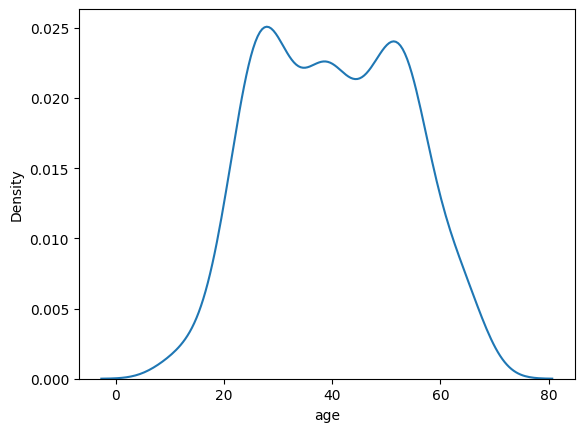

In [7]:
sb.kdeplot(dataset['age'])
plt.show()

From the KDE plot, we can deduce that majority of the test subjects lie between 20 years old and 60 years old.

<Axes: xlabel='age', ylabel='sleep_efficiency'>

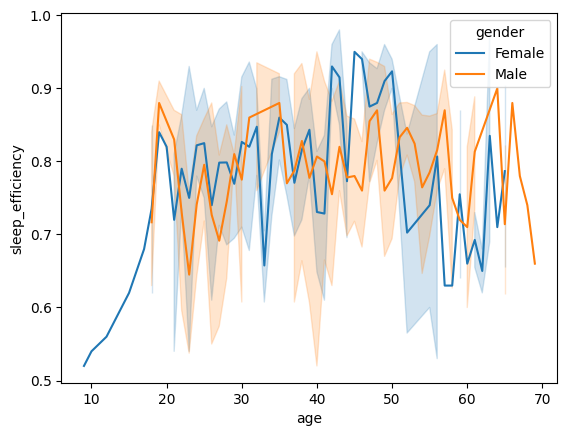

In [8]:
sb.lineplot(data = dataset, x = 'age', y='sleep_efficiency', hue='gender')

From the lineplot, we can observe the trend that women's sleep efficiency peaks in their 40s while men in their 60s.

## Sleep Percentages

### Light Sleep vs Deep Sleep vs REM Sleep
According to sleepfoundation.org, one sleep cycle occurs in 4 stages, 2 stages of light sleep followed by 1 stage of deep sleep and 1 stage of REM Sleep.

#### Light Sleep
Stage 1 (Light Sleep): As your brain slows down, low-amplitude mixed-frequency (LAMF) activity replaces the alpha brain waves that took over as you became drowsy. Your body has some muscle tone, and your breathing is regular.
Stage 2 (Light Sleep): Your heart rate and body temperature both decrease. Sleep spindles and K-complexes, specific brain wave patterns, begin occurring as you continue transitioning toward deep sleep.

#### Deep Sleep
Deep sleep, also called slow-wave sleep, occurs in the third stage of non-rapid eye movement (NREM) sleep. Typically, you descend into deep sleep within an hour of falling asleep, and experience progressively shorter periods of deep sleep as the night wears on. During deep sleep, body functions like breathing and heart rate are also very slow and your muscles are relaxed. It can be difficult for someone to wake you up, and waking up out of deep sleep may make you feel mentally foggy for up to an hour. It is the most sleep stage out of the 4.

#### REM Sleep
Rapid eye movement (REM) sleep is a stage of sleep associated with dreaming and memory consolidation. You experience your first cycle of REM sleep about 60 to 90 minutes after falling asleep. As part of a full night’s sleep, you cycle through four stages of sleep multiple times: three stages of non-REM sleep, followed by one stage of REM sleep. Each cycle through all the sleep stages takes 90 to 120 minutes to complete. With each new cycle, you spend increasing amounts of time in REM sleep, with most of your REM sleep taking place in the second half of the night.

### Relationship between Sleep duration and Sleep Percentages

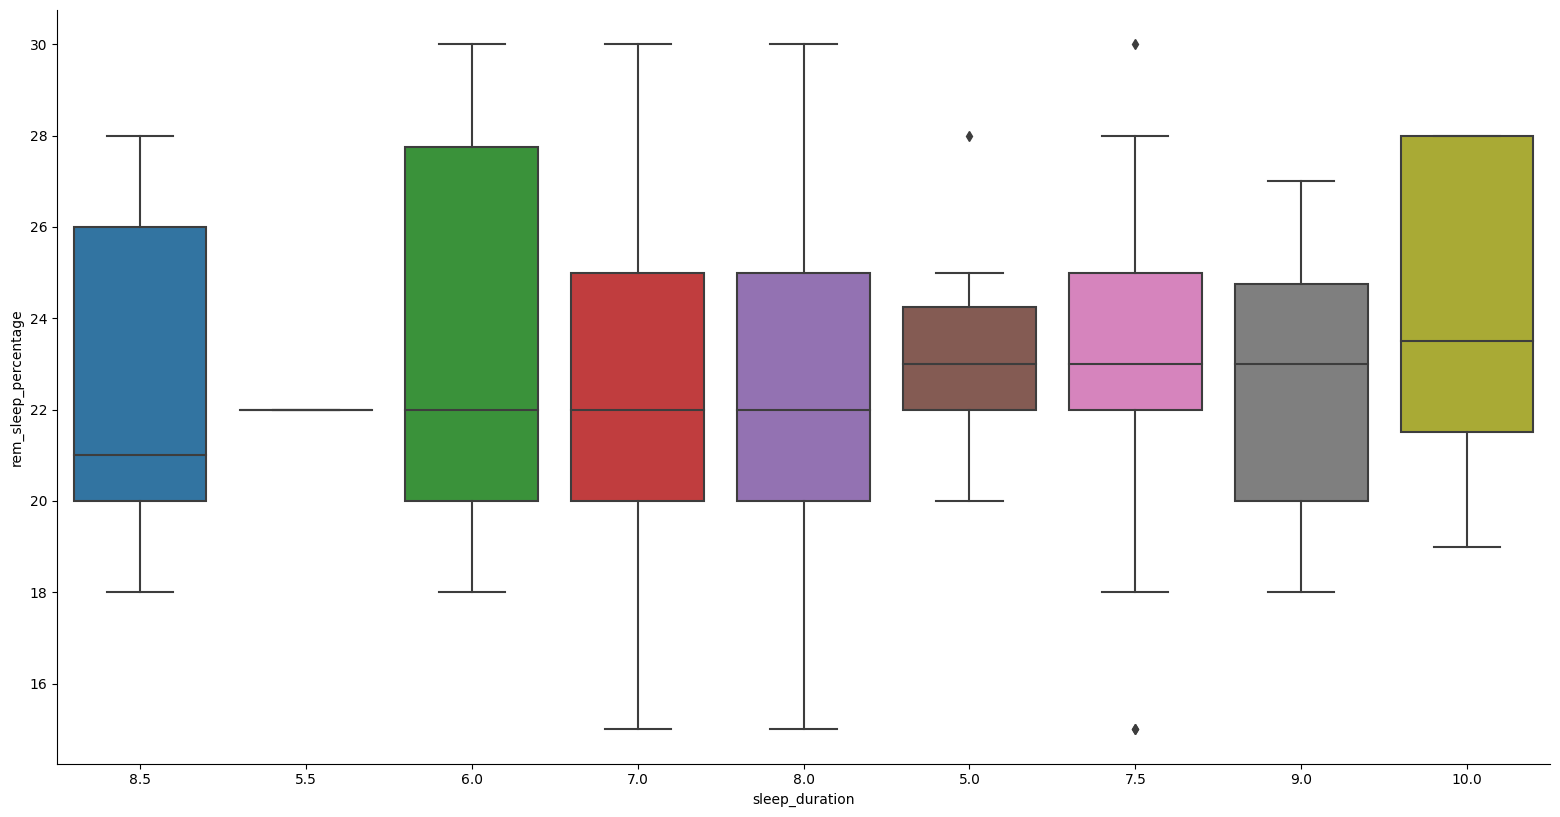

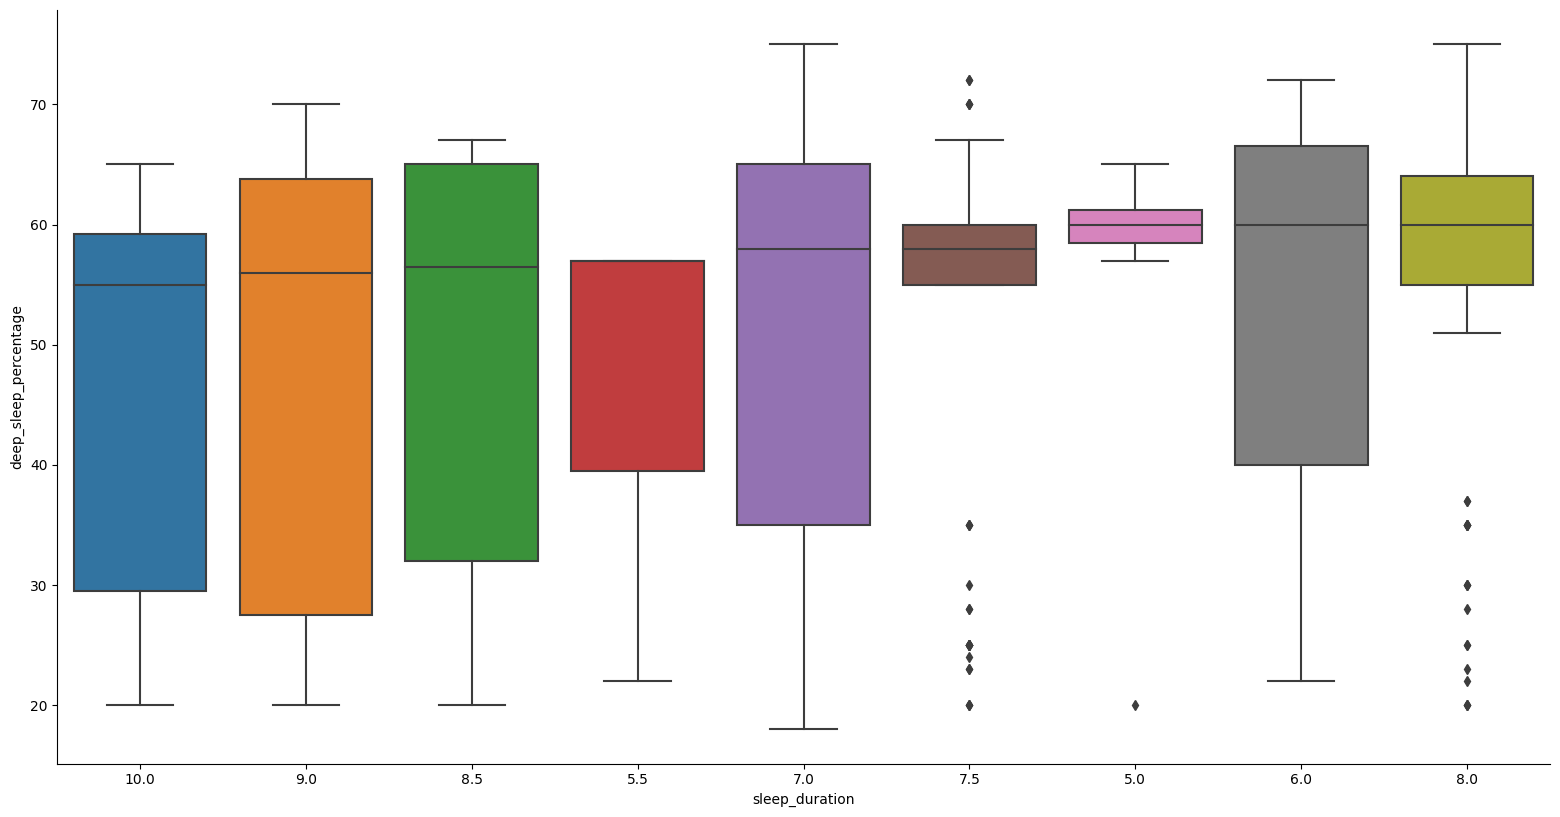

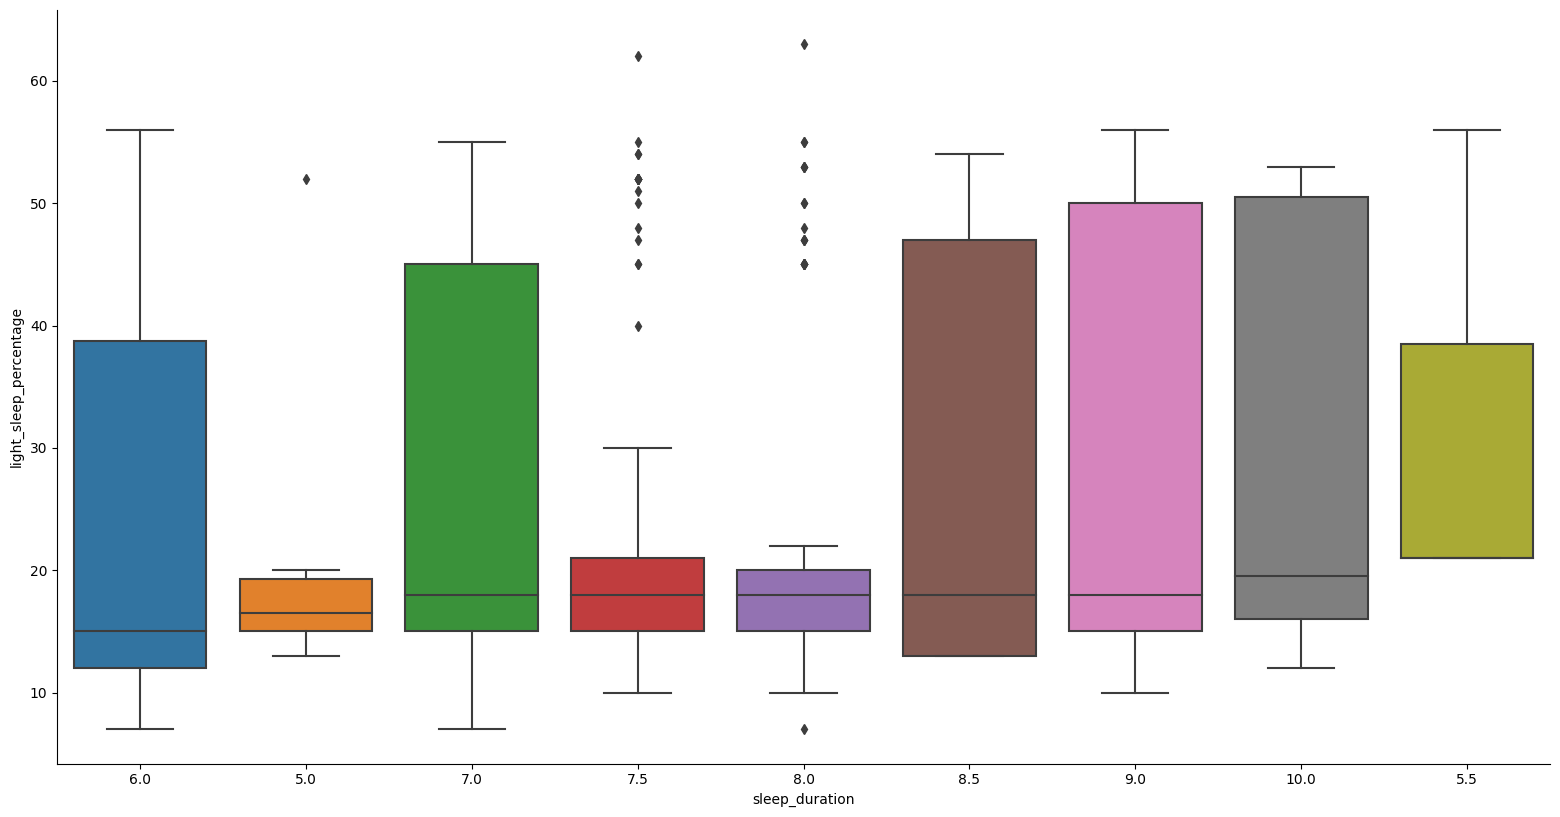

In [9]:
sleep_duration = dataset.filter(['sleep_duration', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage'])

for var in sleep_duration:
    if var != 'sleep_duration':
        tmp=sleep_duration.filter(['sleep_duration',var])
        sb.catplot(data=tmp, x='sleep_duration', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('sleep_duration')[var].median().sort_values().index)

From the boxplots, we can observe that there are some relations between sleep duration and the respective sleep percentages. However, the trends are inconclusive.

### Relationship between Sleep Efficiency and Sleep Percentages

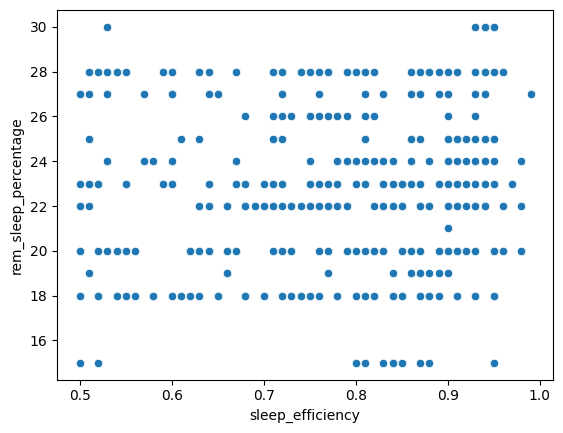

rem_sleep_percentage Correlation: 0.062362454433546856


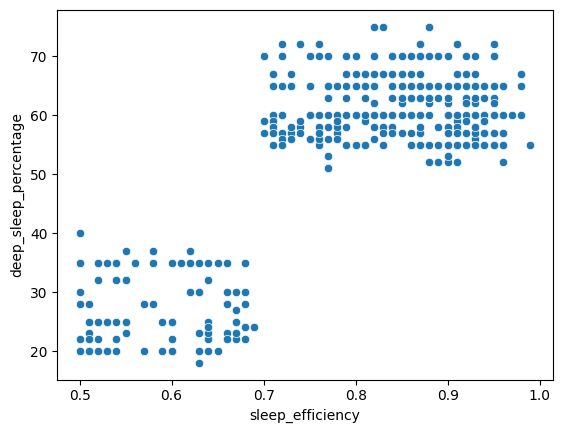

deep_sleep_percentage Correlation: 0.7873351005513035


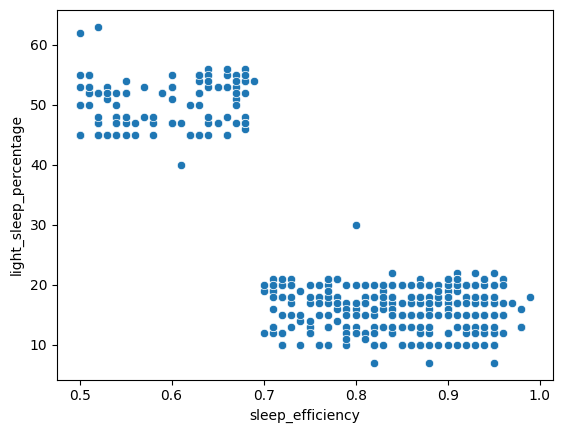

light_sleep_percentage Correlation: -0.8192040344055319


In [10]:
sleep_percentages = dataset.filter(['sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage'])

for var in sleep_percentages:
    if var != 'sleep_efficiency':
        tmp=sleep_percentages.filter(['sleep_efficiency',var])
        sb.scatterplot(data = tmp, x = 'sleep_efficiency', y=var)
        plt.show()
        print(var + " Correlation: " + str(tmp['sleep_efficiency'].corr(tmp[var])))

From the scatterplots, we can deduce the following:

1. There is no strong relation between sleep efficiency and REM sleep percentage.

2. Deep sleep percentage generally increases with sleep efficiency. (Correlation = 0.7873351005513035)

3. Light sleep percentage generally decreases with sleep efficiency. (Correlation = -0.8192040344055319)

## Sleep Quality

#### Sleep Quality is affected by 3 factors:
#### 1. Sleep Efficiency
People who spend less than 85% of their time in bed not sleeping have poor sleep efficiency.
#### 2. Deep Sleep Percentage
The second stage of a sleep cycle is the most important as it is the stage where the most muscle recovery and brain development occurs.
#### 3. REM Sleep Percentage
The final stage oa sleep cycle
#### 4. Number of Awakenings
The number of times a person wakes up in a middle of the night affects their sleep quality


to further elaborate the reasons

https://www.sleepfoundation.org/sleep-hygiene/how-is-sleep-quality-calculated

### Does Bed Time affect Sleep Quality?

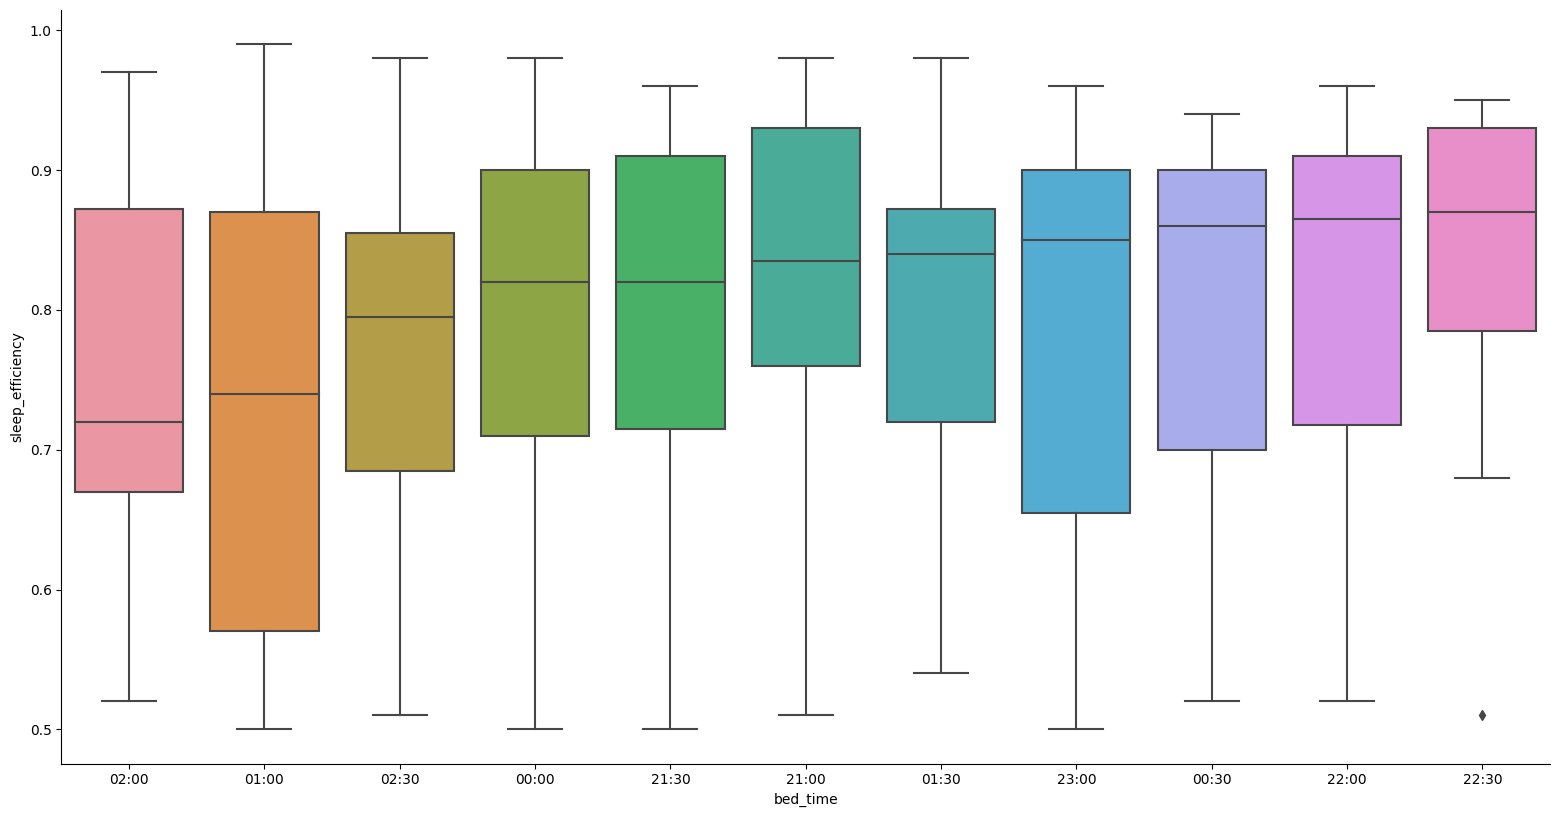

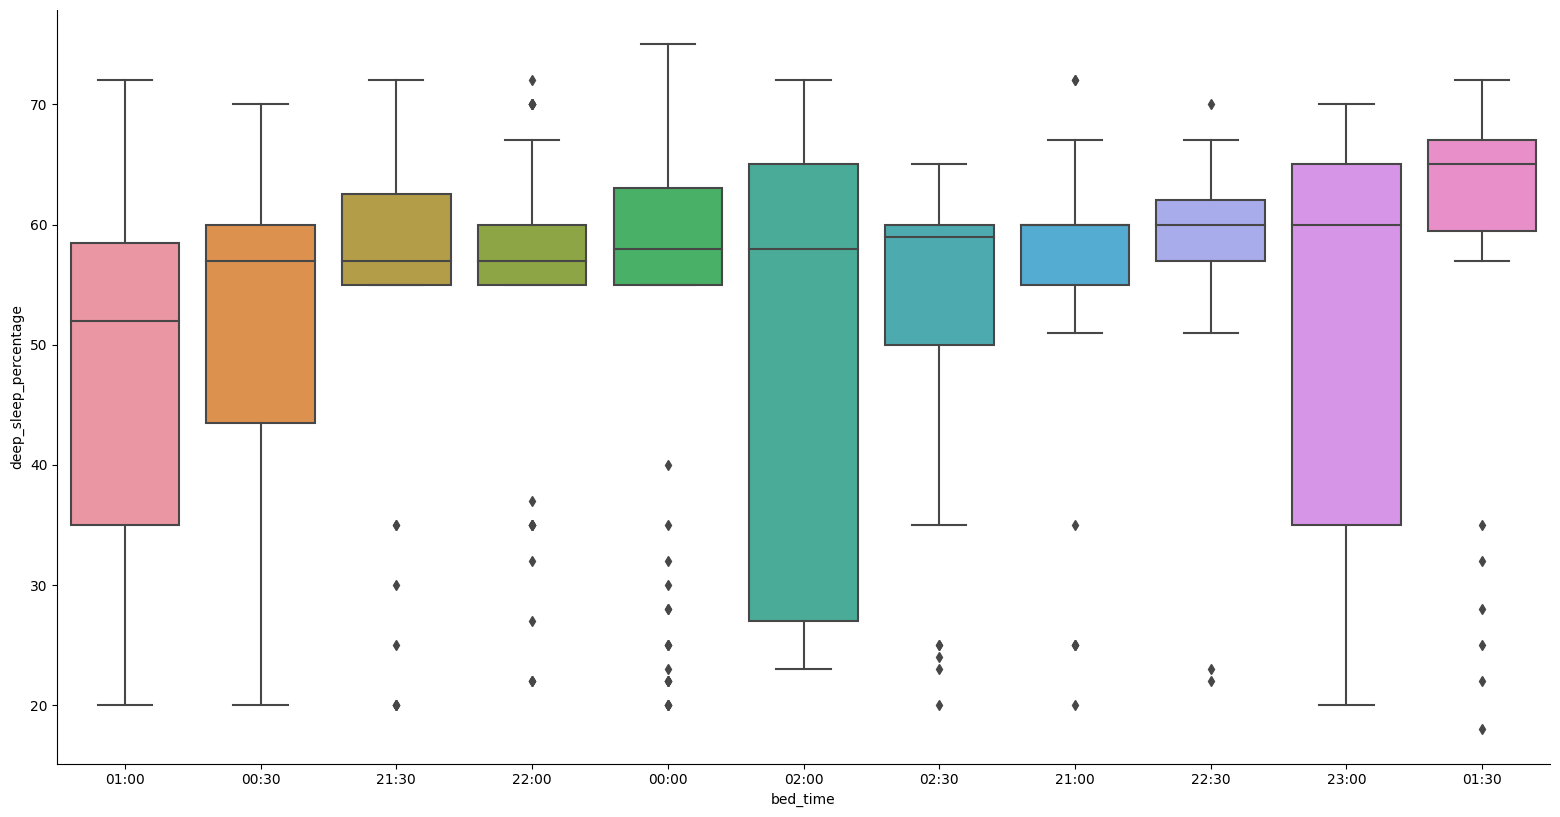

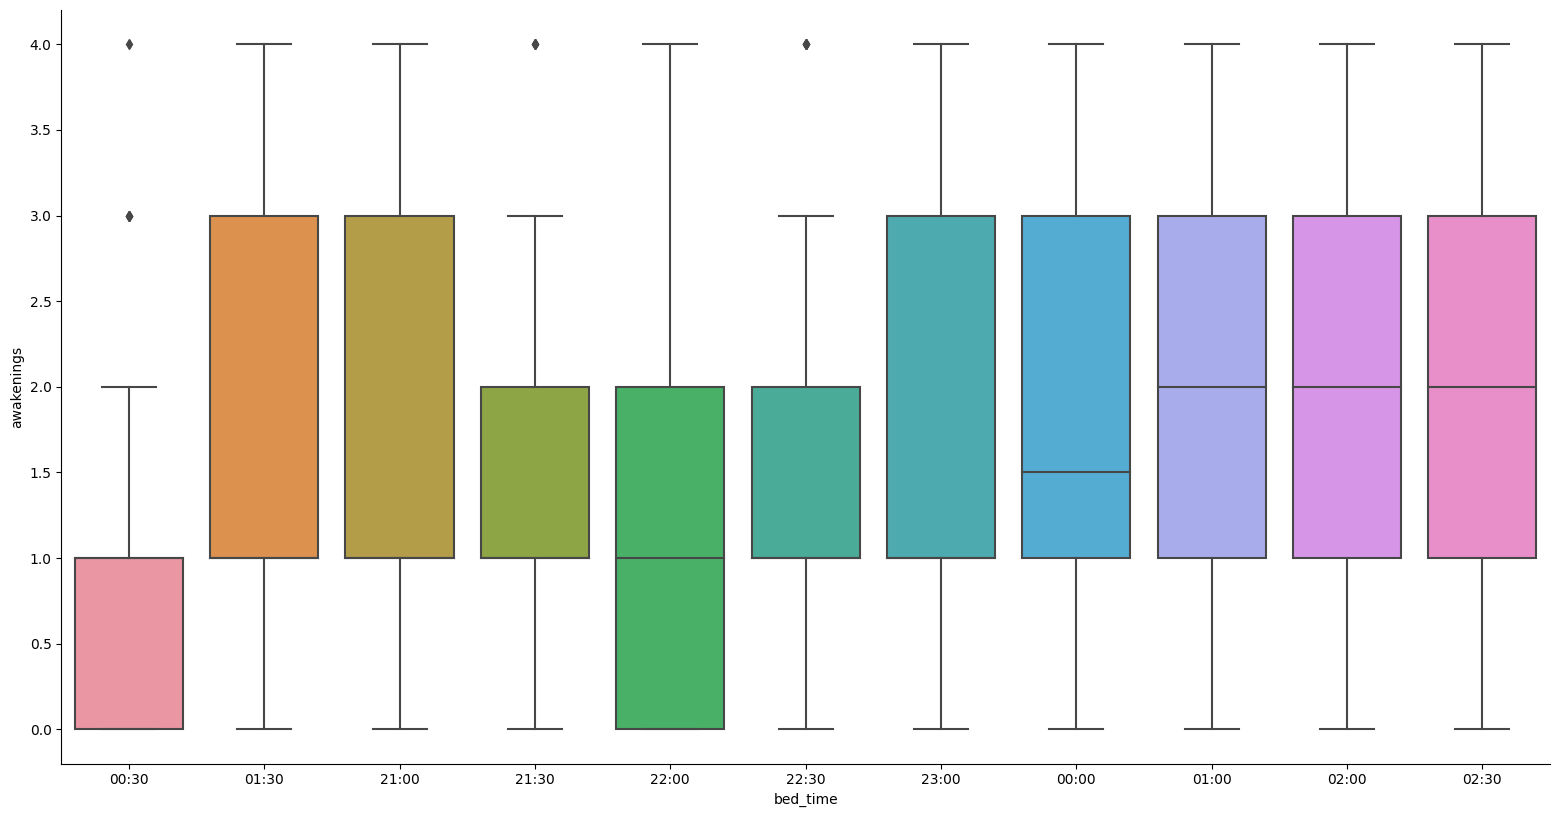

In [11]:
bedtime = dataset.filter(['bed_time', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in bedtime:
    if var != 'bed_time':
        tmp=bedtime.filter(['bed_time',var])
        sb.catplot(data=tmp, x='bed_time', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('bed_time')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. Sleep efficiency is maximised if a person goes to bed at around 10-11pm.

2. Deep sleep percentage is maximised at around 10:30-11pm with 1:30am being an exception

3. There is no strong relation between the bed time and number of awakenings.

Overall, bed time is an important factor that affects sleep quality. From the analysis, the ideal time to go to bed to maximise sleep quality is somewhere between 10-11pm.

### Does Sleep Duration affect Sleep Quality?

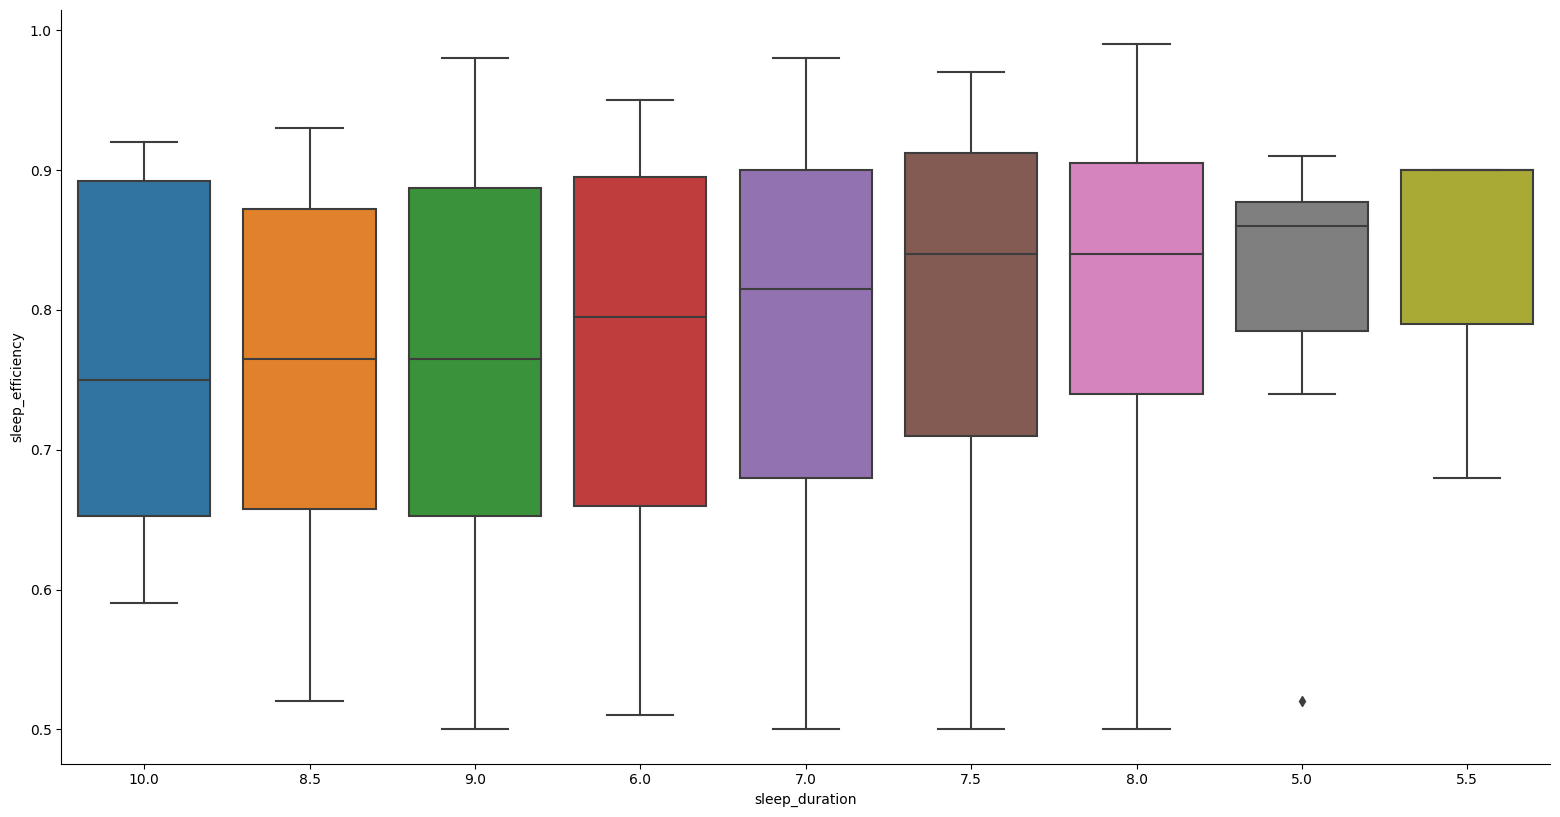

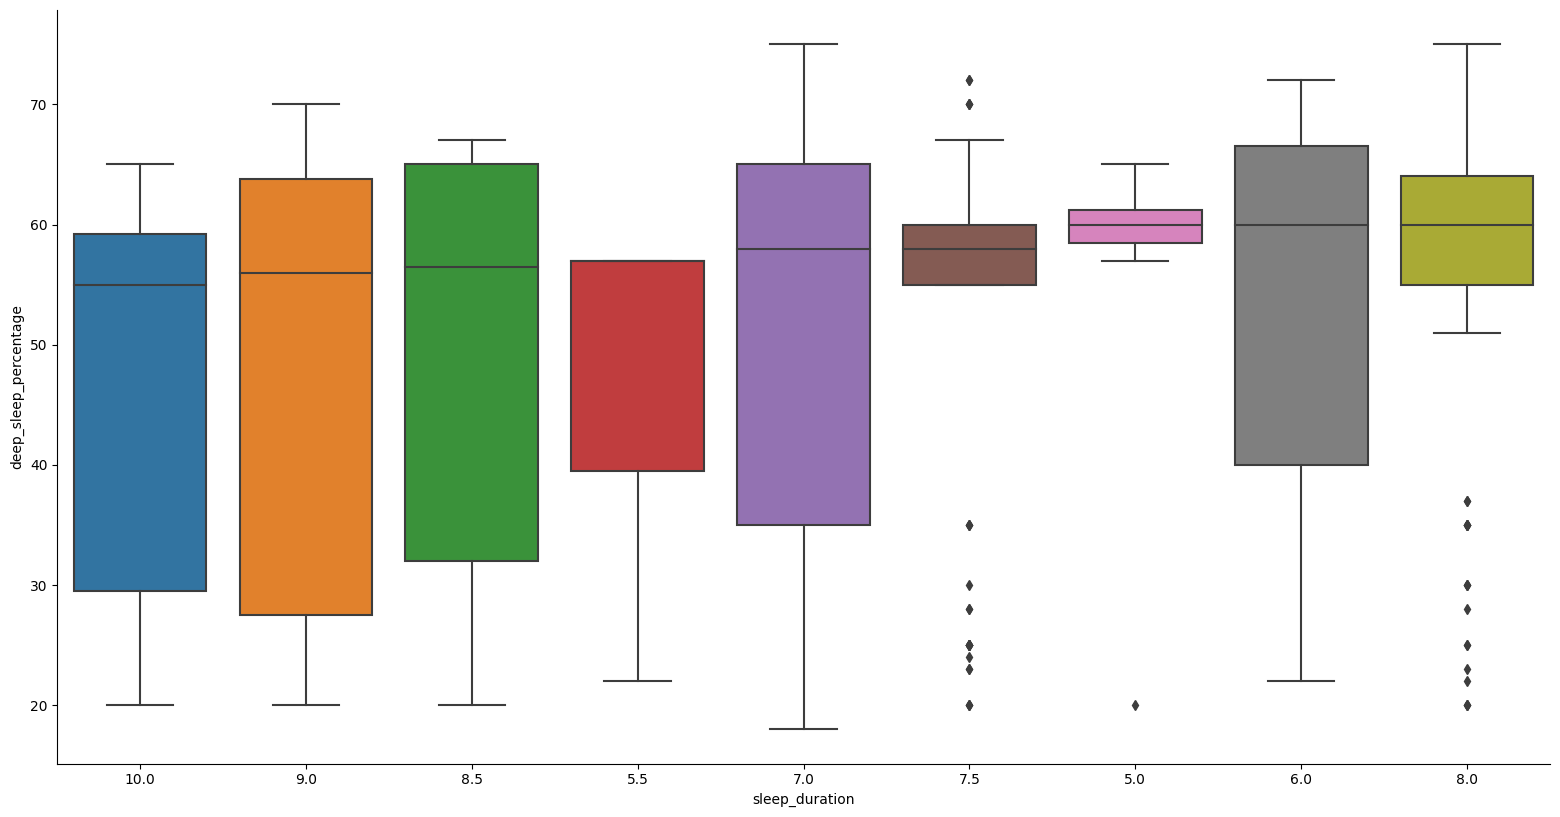

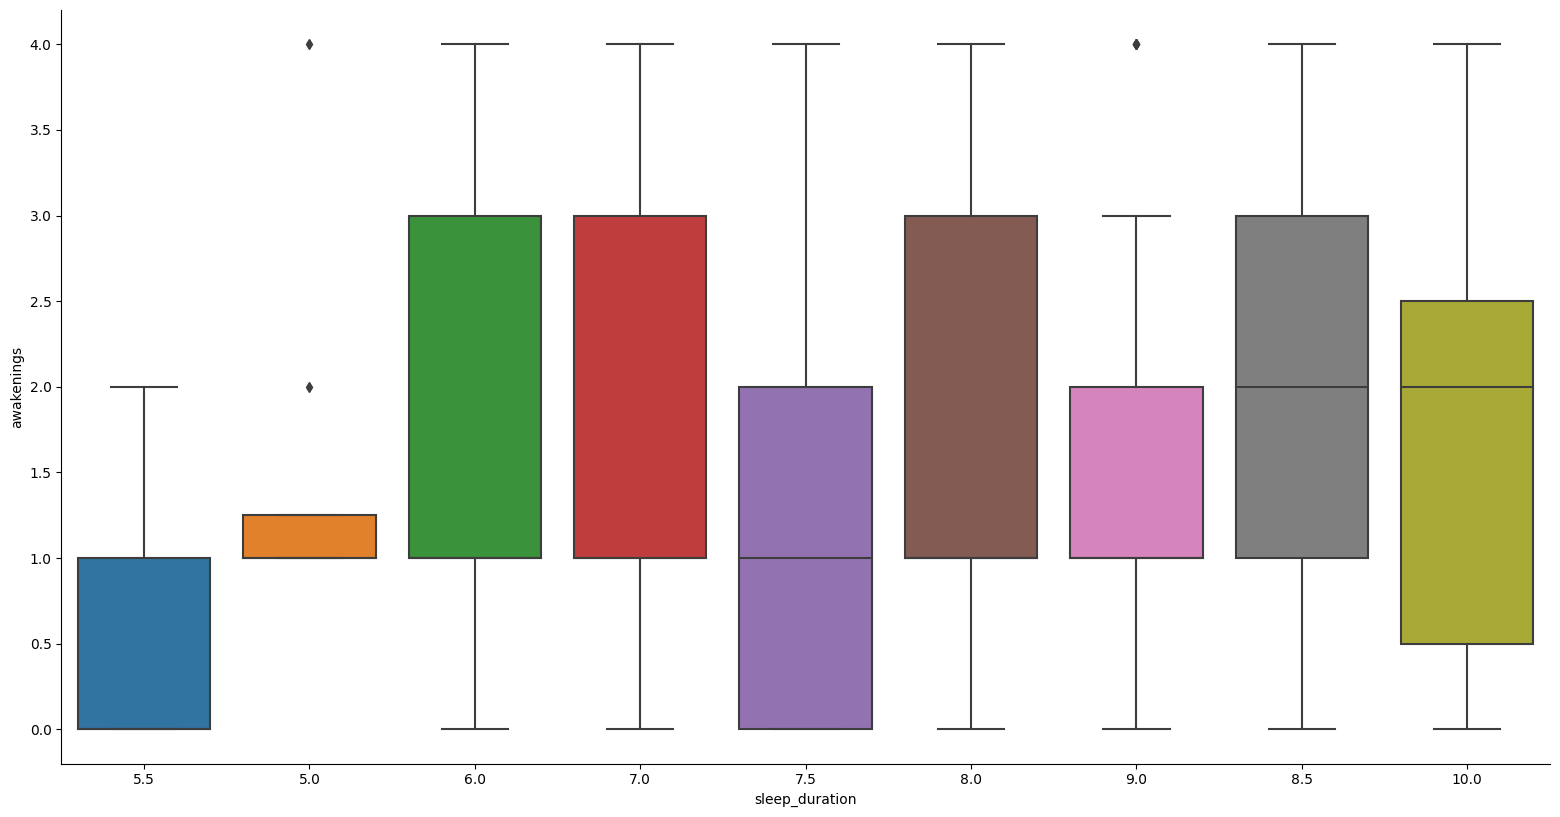

In [12]:
sleep_duration = dataset.filter(['sleep_duration', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in sleep_duration:
    if var != 'sleep_duration':
        tmp=sleep_duration.filter(['sleep_duration',var])
        sb.catplot(data=tmp, x='sleep_duration', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('sleep_duration')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. Sleep efficiency generally increases with when sleep duration decreases.

2. Deep sleep percentage is maximised around 6-8 hours of sleep, whereas too much sleep(10 hours) causes deep sleep percentage to be minimal.

3. Generally, the number of awakenings increases with longer sleep duration.

Overall, sleep duration is an important factor that affects sleep quality. According to the analysis, sleeping around 6-8 hours will maximise sleep quality.

### Does Exercise Frequency affect Sleep Quality?

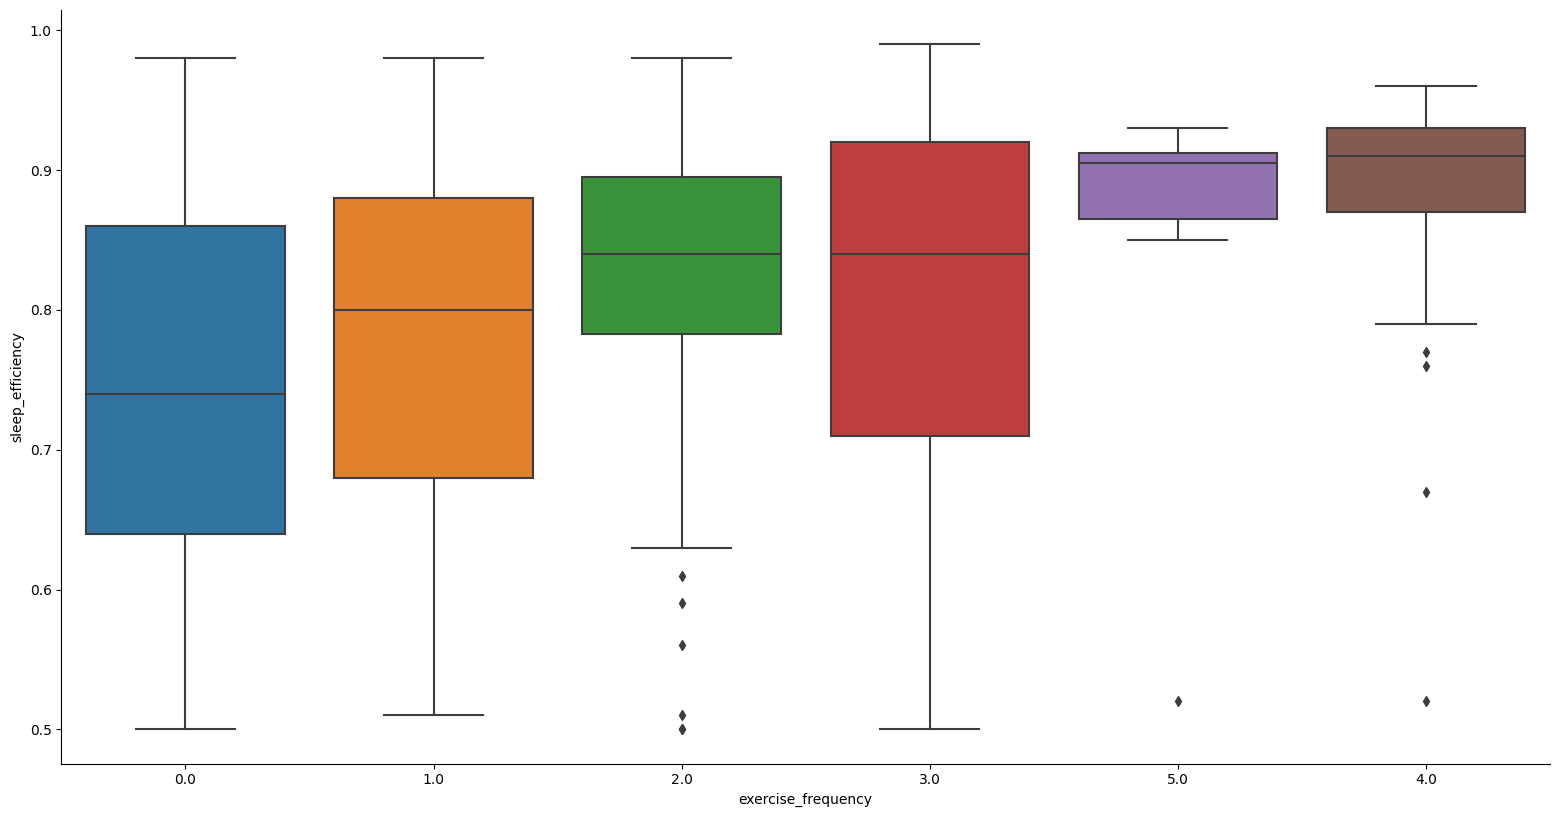

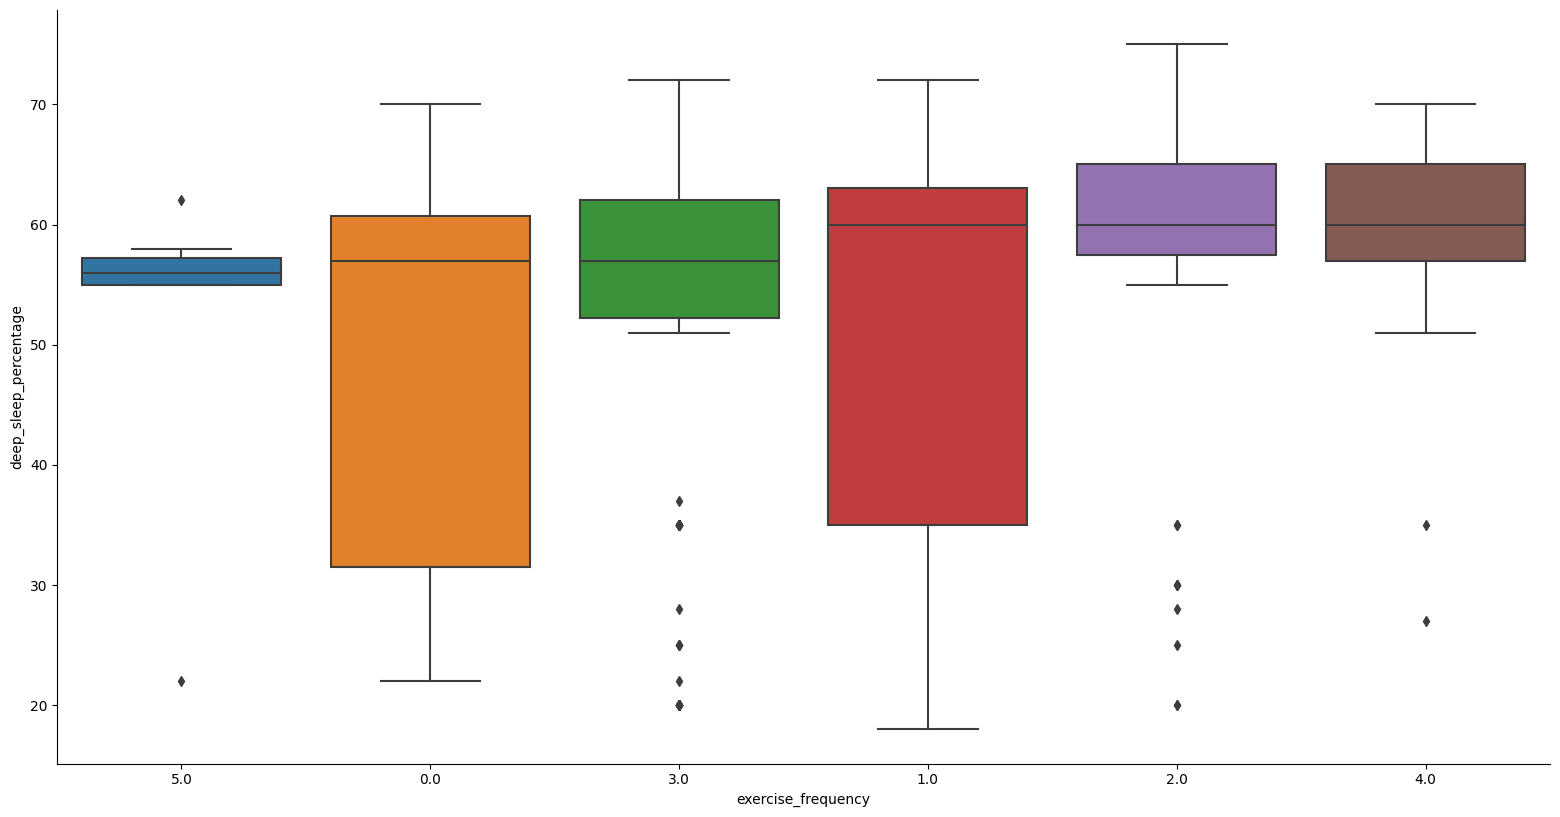

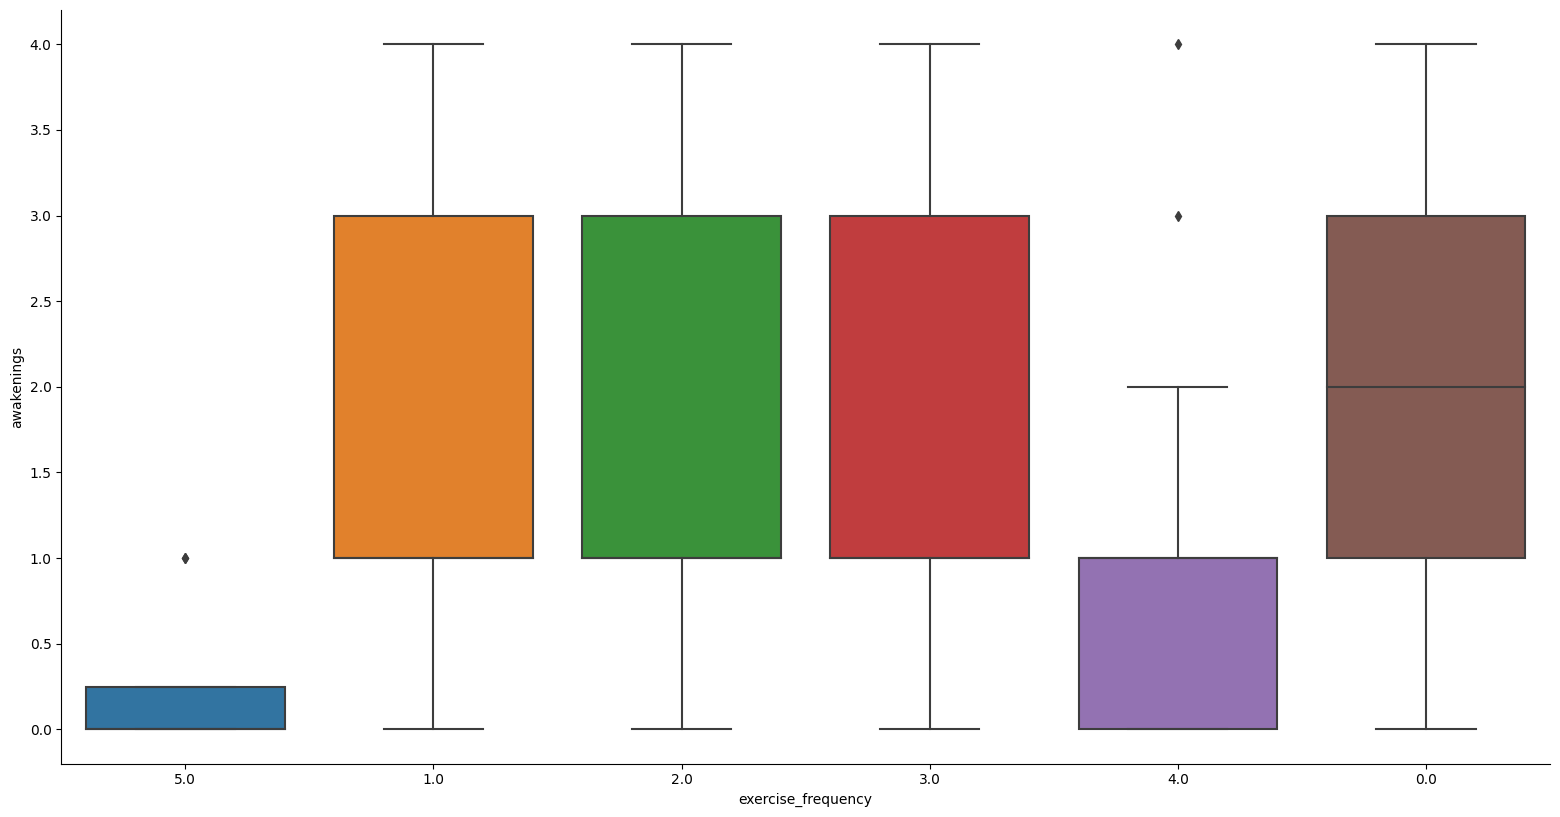

In [13]:
exercise = dataset.filter(['exercise_frequency', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in exercise:
    if var != 'exercise_frequency':
        tmp=exercise.filter(['exercise_frequency',var])
        sb.catplot(data=tmp, x='exercise_frequency', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('exercise_frequency')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. Sleep efficiency generally increases with exercise frequency.

2. Although not a strong relation, deep sleep percentage generally increases with exercise frequency

3. There is no strong relation between exercise frequency and number of awakenings

Overall, some level of exercise does improve sleep quality but too much exercise can negatively affect sleep quality. However exercise frequency may not be that important of a factor that affects sleep quality as there are no strong trends observed as a whole. 

### Does Caffeine Consumption affect Sleep Quality?

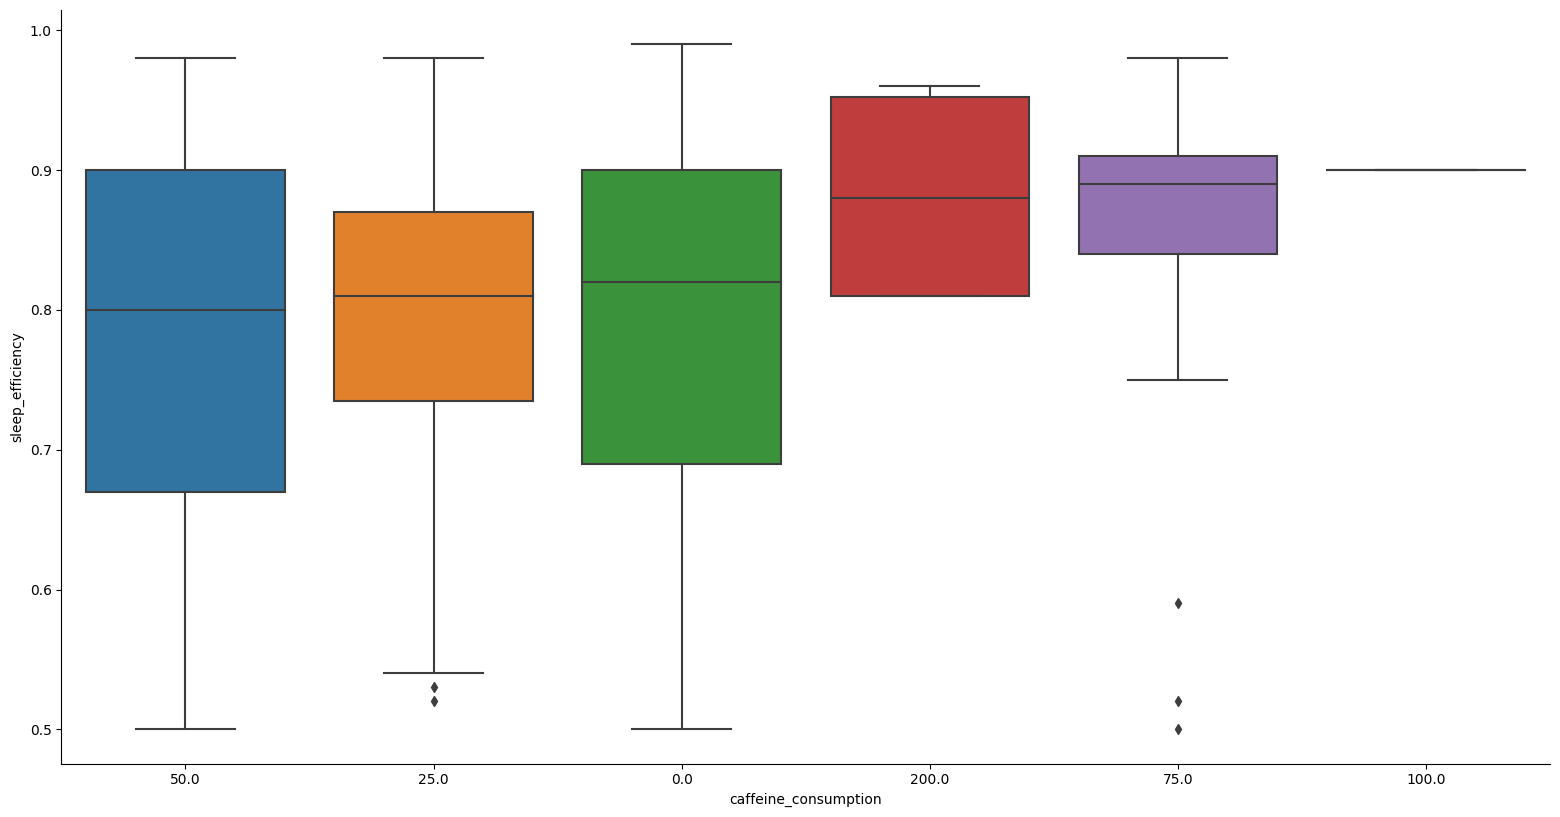

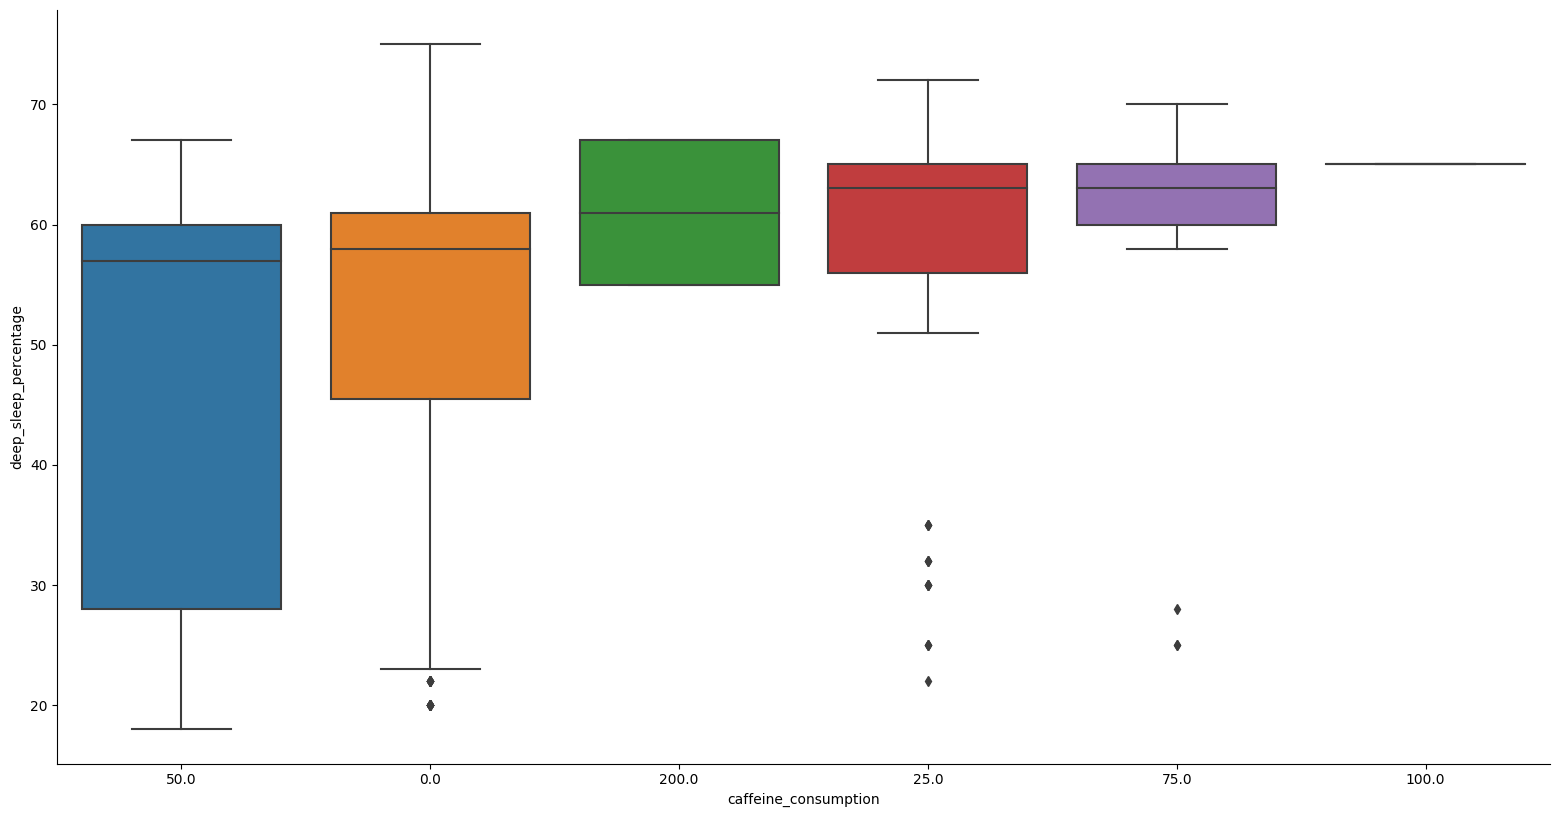

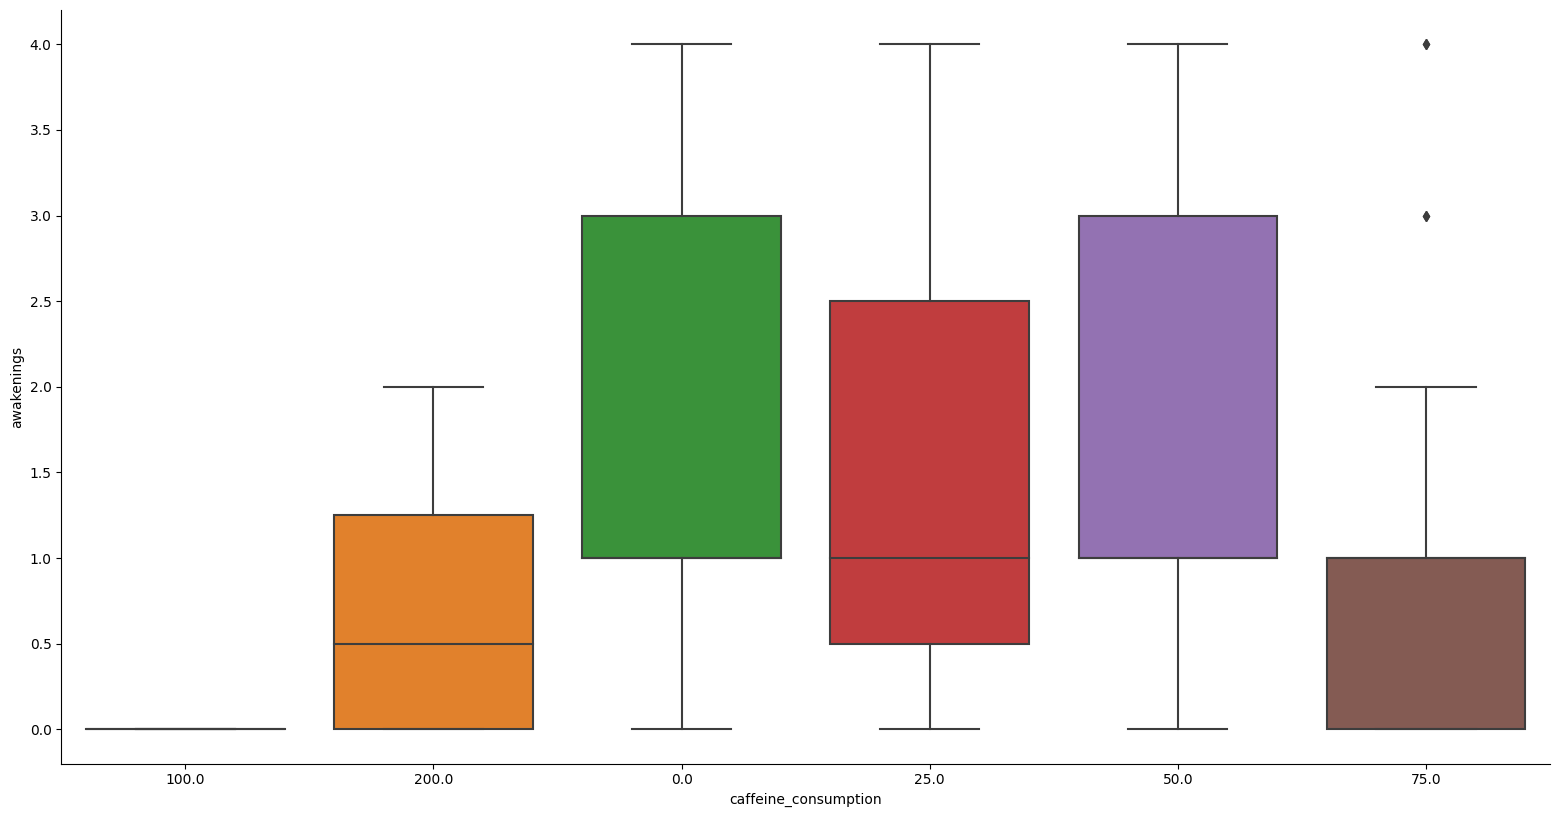

In [14]:
caffeine = dataset.filter(['caffeine_consumption', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in caffeine:
    if var != 'caffeine_consumption':
        tmp=caffeine.filter(['caffeine_consumption',var])
        sb.catplot(data=tmp, x='caffeine_consumption', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('caffeine_consumption')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. There is no trend observed for the relationship between caffeine consumption and sleep efficiency.

2. There is no trend observed for the relationship between caffeine consumption and deep sleep percentage.

3. There is no strong trend observed for the relationship between caffeine consumption and number of awakenings

Overall, caffeine consumption is not really an important factor that affects sleep quality.

### Does Alcohol Consumption affect Sleep Quality?

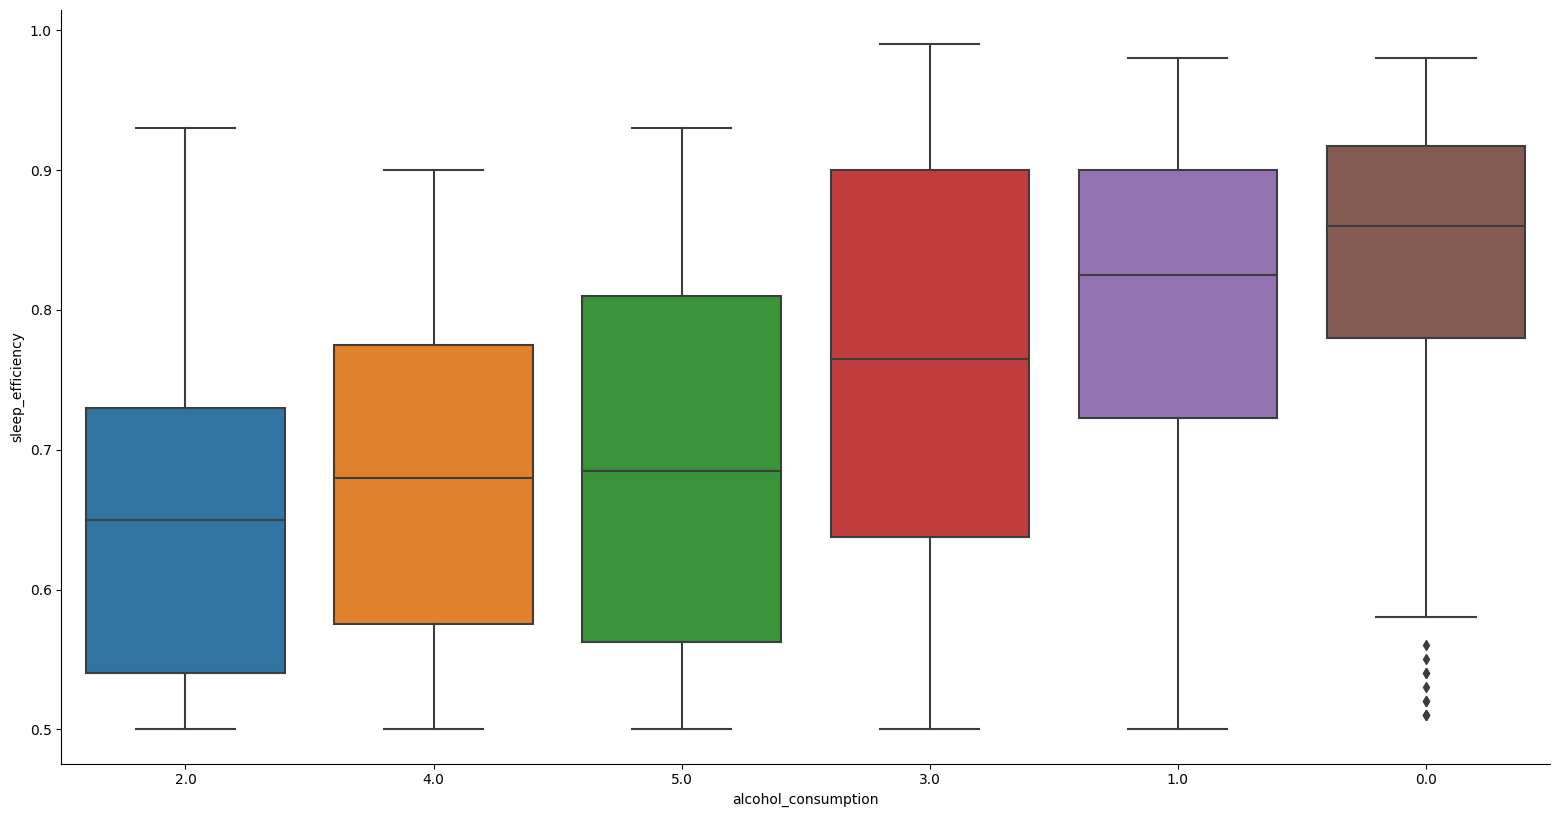

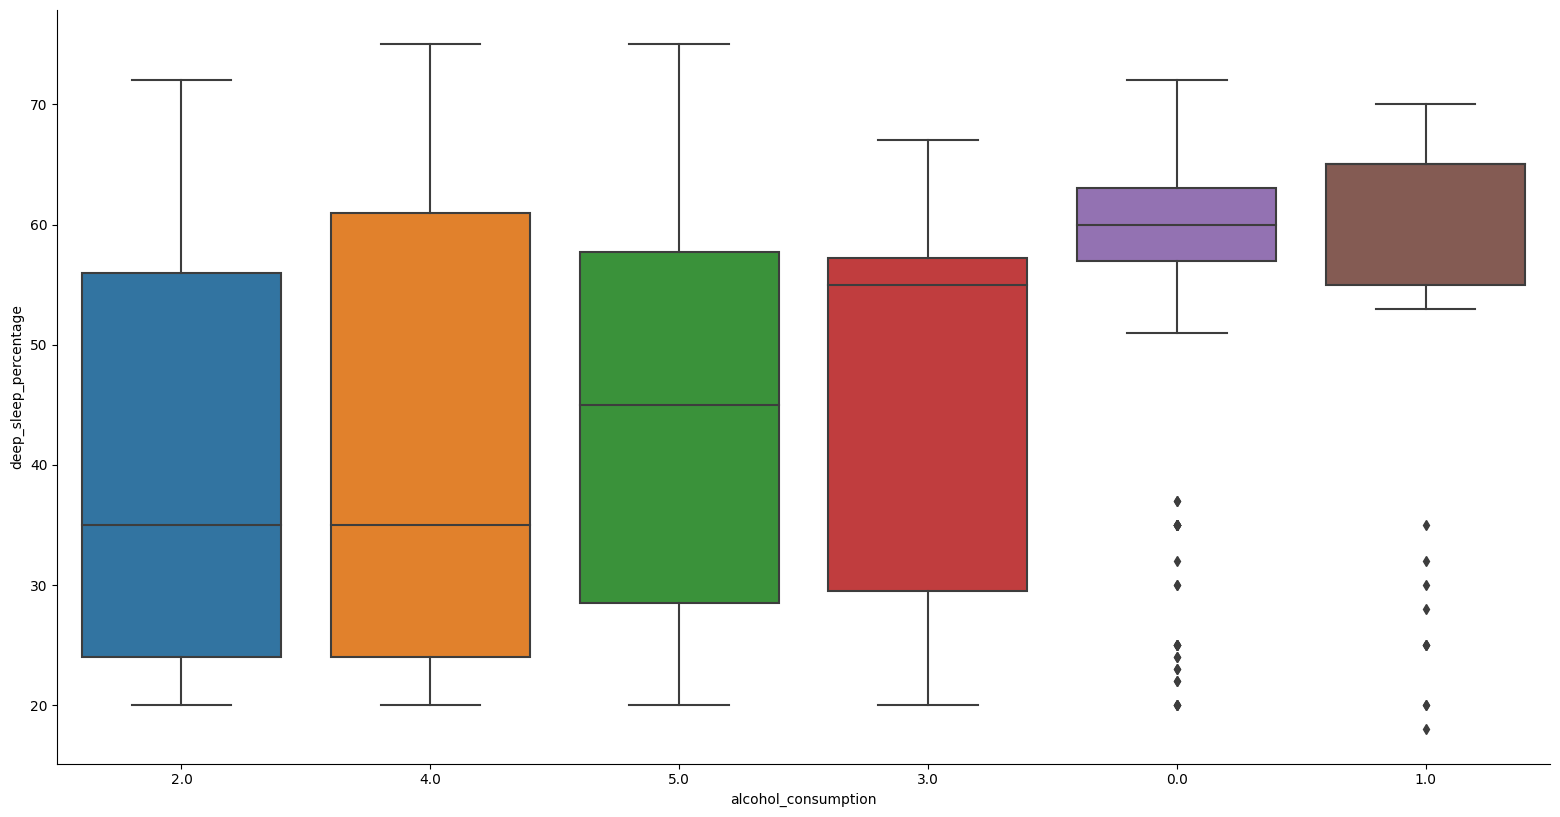

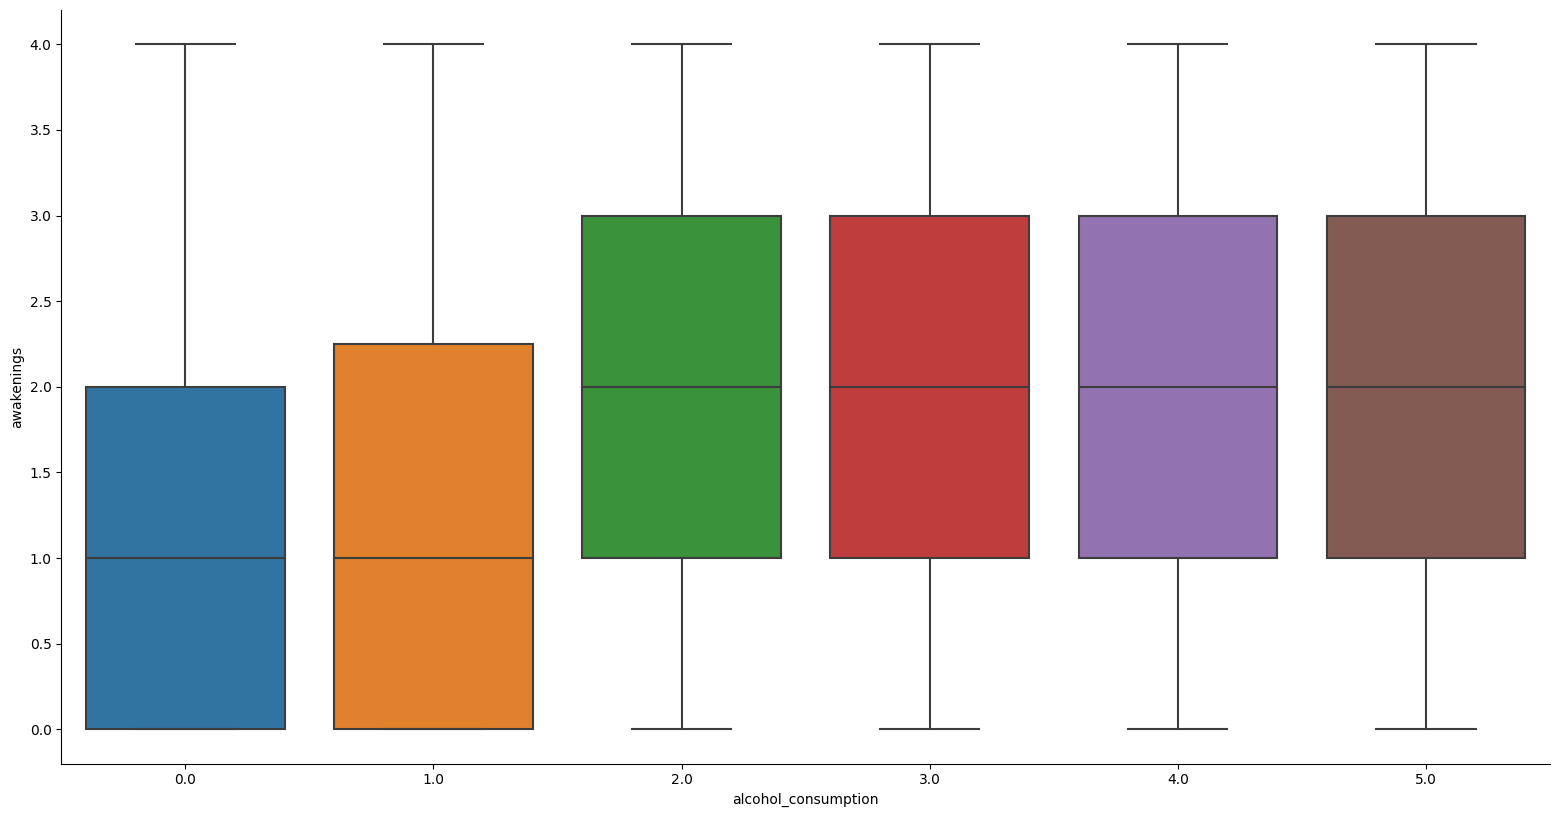

In [15]:
alcohol = dataset.filter(['alcohol_consumption', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in alcohol:
    if var != 'alcohol_consumption':
        tmp=alcohol.filter(['alcohol_consumption',var])
        sb.catplot(data=tmp, x='alcohol_consumption', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('alcohol_consumption')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. Generally, sleep efficiency is maximised when alcohol consumption is minimised.

2. Generally, deep sleep percentage increases with lower alcohol consumption. However, there are many outliers for alcohol consumption of 1.0 and 0 oz.

3. Generally, number of awakenings increases with increased alcohol consumption.

Overall, alcohol does affect sleep quality when consumed in excess. Ideally, sleep quality is maximised when no alcohol is consumed.

### Does Smoking affect Sleep Quality?

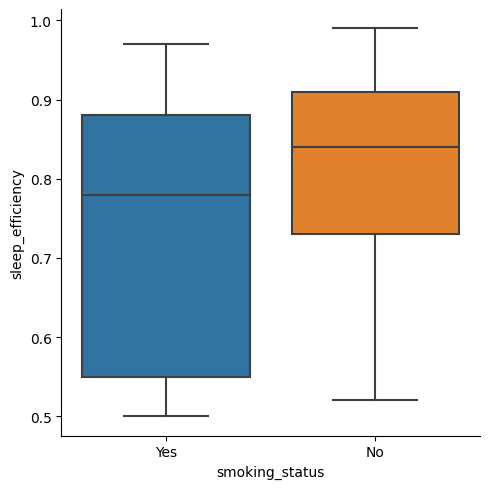

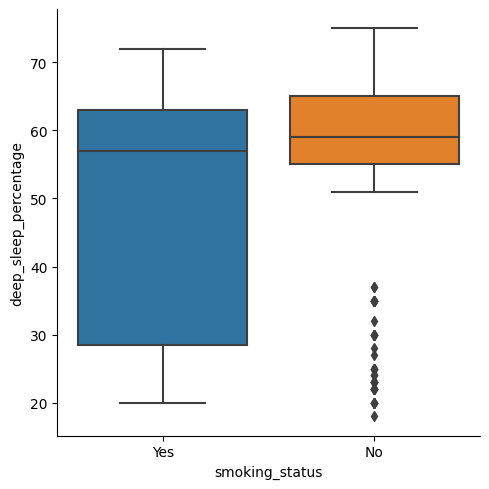

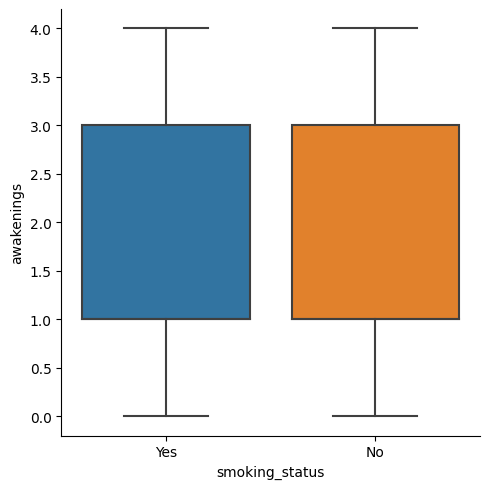

In [16]:
smoking = dataset.filter(['smoking_status', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in smoking:
    if var != 'smoking_status':
        tmp=smoking.filter(['smoking_status',var])
        sb.catplot(data=tmp, x='smoking_status', y=var, kind='box')

From the box plots above, we can deduce the following:

1. Generally, smokers have lower sleep efficiency as compared to non-smokers.

2. Generally, smokers have a slightly lower deep sleep percentage as compared to non-smokers. However, there are many outliers that have low deep sleep percentage for non-smokers.

3. There is no relation between smoking status and number of awakenings.

From the analysis, we can observe that smoking decreases sleep efficiency but may not have a very strong impact of deep sleep percentage and has no effect on number of awakenings. Therefore, smoking is a factor that affects sleep quality although not as strong.

## Principal Component Analysis(PCA)
In this portion, we will use PCA which is a technique for reducing the dimensionality of a dataset by identifying the most important underlying patterns or features. We apply PCA to the existing variables(sleep efficiency, deep sleep percentage, rem sleep percentage, number of awakenings) to identify the principal components that explain the most variance in the data. Based on the the contribution of each variable to the principal components, we can assign weights to each of the existing variables.

1. Data Preparation: 
Collect data on the different factors that contribute to sleep quality, such as sleep efficiency, deep sleep percentage, REM sleep percentage, and number of awakenings. The data should be in a numerical format and should be normalized so that each variable has a mean of 0 and a standard deviation of 1.

2. Perform PCA: 
Apply PCA to the normalized data to identify the principal components that explain the most variance in the data. The number of principal components to keep should be determined by examining the explained variance ratio or scree plot, and selecting the number of components that capture a sufficient amount of variance in the data.

3. Interpret Principal Components: 
Examine the loadings of each variable on the principal components to understand which variables contribute the most to each component. The loadings represent the correlation between each variable and the principal component, and can be positive or negative. Variables with high absolute loadings are most strongly associated with the principal component.

4. Calculate Weights: 
Once the principal components and variable loadings are identified, the weights for each variable can be calculated based on their contribution to the principal components. For example, the weight for sleep efficiency could be based on its loading on the first principal component, while the weight for deep sleep percentage could be based on its loading on the second principal component.

5. Calculate Sleep Quality Score: 
Finally, the sleep quality score can be calculated as a weighted sum of the different variables using the weights identified in step 4. For example, the sleep quality score could be calculated as:

Sleep Quality Score = w1 * Sleep Efficiency + w2 * Deep Sleep Percentage + w3 * REM Sleep Percentage - w4 * Number of Awakenings

where w1, w2, w3, and w4 are the weights calculated based on the PCA analysis.

It's important to note that PCA is just one approach to identifying weights for the different variables. The weights identified using PCA may not be optimal for all datasets or contexts, so it's important to carefully evaluate the results and consider other approaches as well.


### Import Libraries for PCA

In [17]:
#import libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Fill in missing values for awakenings

In [18]:
#Fill in missing values for awakenings
mean_awakenings = dataset['awakenings'].mean()
dataset['awakenings'].fillna(value=mean_awakenings, inplace=True)
ds_filled = dataset.fillna(value=mean_awakenings)

### Standardize the data

In [210]:
sleep_quality_vars = ds_filled.filter(['sleep_efficiency', 'deep_sleep_percentage', 'rem_sleep_percentage','light_sleep_percentage','awakenings'])

# Normalize the data using the StandardScaler
scaler = StandardScaler() 
sleep_scaled = scaler.fit_transform(sleep_quality_vars)

print(sleep_scaled)

[[ 0.67426034  1.09849019 -1.31032529 -0.82121854 -1.23876602]
 [-0.95431503 -1.58746264 -1.02640054  1.8590953   1.02560741]
 [ 0.74828649  1.09849019 -0.74247579 -0.95196556 -0.48397487]
 ...
 [-1.76860272 -1.33165761 -0.74247579  1.53222776 -0.48397487]
 [-0.2140535   1.22639271 -1.31032529 -0.95196556  1.02560741]
 [-1.17639349 -1.90721893 -0.17462629  1.98984231 -0.48397487]]


### Create a PCA Object with all components and fit the PCA model to the scaled data

In [211]:
# Apply PCA to the normalized data
pca = PCA()
sleep_pca = pca.fit_transform(sleep_scaled)

# Examine explained variance ratio to determine number of principal components to keep
print(pca.explained_variance_ratio_)

[5.91054096e-01 2.14346972e-01 1.62437452e-01 3.21614797e-02
 3.19686949e-32]


### Creating Sleep Quality based on weightage derived from PCA Explained Variance Ratio

In [213]:
#Create sleep quality based on the PCA components and the weights
weights = [5.91054096e-01,2.14346972e-01,1.62437452e-01,3.21614797e-02,3.19686949e-32]
sleep_quality = (sleep_pca[:,0] * weights[0]) + (sleep_pca[:,1] * weights[1]) + (sleep_pca[:,2] * weights[2]) + (sleep_pca[:,3] * weights[3])
ds_filled['sleep_quality'] = sleep_quality
ds_filled.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,...,exercise_frequency,sleep_quality,bed_time_edited,bed_time_encoded,smoking,gender_type,wake_time_edited,wake_time_encoded,wakeup_time_edited,wakeup_time_encoded
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,...,3.0,-1.038628,1,1.0,1,0,7,7.0,7,7.0
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,...,3.0,1.705723,2,2.0,1,1,9,9.0,9,9.0
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,...,3.0,-0.876008,21,21.0,0,0,5,5.0,5,5.0
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,...,1.0,2.028781,2,2.0,1,0,8,8.0,8,8.0
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,...,3.0,0.192627,1,1.0,0,1,9,9.0,9,9.0


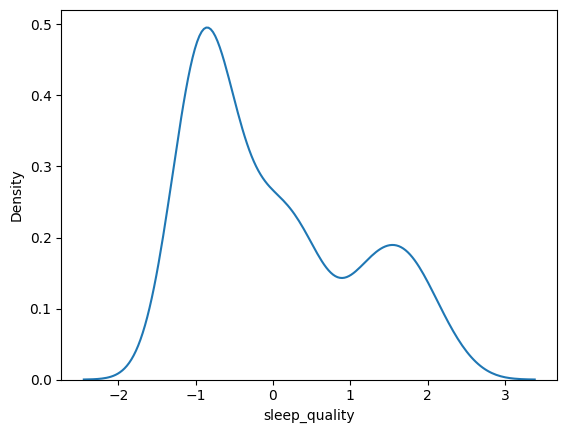

In [214]:
sb.kdeplot(ds_filled['sleep_quality'])
plt.show()

## Creating Machine Learning Model
### Objective: Based on this model, we can predict a person's sleep quality based on his lifestyle choices

## Checkpoint 3. Methodology
Explain the reason for choosing your machine learning model.
Detailed & formal introduction to your model. You must provide the formulation or diagram of the model you use thoroughly. 
Clarify how you train and inference based on the model you choose.
Clarify the choice of hyperparameters of your model.


## Random Forest Regression

### Random Forest Regression based on Sleep Quality w.r.t. lifestyle Choices (bed time, sleep duration, caffeine consumption, alcohol consumption, smoking)

### Importing Libraries

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime

### Fill up missing data
### Encode catergorical variables as numerical variables

In [215]:
#Fill up missing data
mean_caffeine = ds_filled['caffeine_consumption'].mean()
ds_filled['caffeine_consumption'].fillna(value=mean_caffeine, inplace=True)

mean_alcohol = ds_filled['alcohol_consumption'].mean()
ds_filled['alcohol_consumption'].fillna(value=mean_alcohol, inplace=True)

mean_exercise = ds_filled['exercise_frequency'].mean()
ds_filled['exercise_frequency'].fillna(value=mean_exercise, inplace=True)

#Encode categorical variables bedtime as numerical variables
ds_filled['bed_time_edited'] = ds_filled['bed_time'].apply(lambda x: datetime.strptime(x, '%H:%M').hour)
encoder = OrdinalEncoder(categories=[range(0, 24)])
ds_filled['bed_time_encoded'] = encoder.fit_transform(ds_filled[['bed_time_edited']])

#Encode categorical variables wakeuptime as numerical variables
ds_filled['wakeup_time_edited'] = ds_filled['wakeup_time'].apply(lambda x: datetime.strptime(x, '%H:%M').hour)
encoder = OrdinalEncoder(categories=[range(0, 24)])
ds_filled['wakeup_time_encoded'] = encoder.fit_transform(ds_filled[['wakeup_time_edited']])

#Change smoking status from Yes or No to 1 or 0
ds_filled['smoking']=ds_filled['smoking_status'].apply(lambda x:1 if x=='Yes' else 0)
ds_filled.head()

#Change gender to one and 0
ds_filled['gender_type']=ds_filled['gender'].apply(lambda x:1 if x=='Male' else 0)
ds_filled.head()



,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,...,exercise_frequency,sleep_quality,bed_time_edited,bed_time_encoded,smoking,gender_type,wake_time_edited,wake_time_encoded,wakeup_time_edited,wakeup_time_encoded
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,...,3.0,-1.038628,1,1.0,1,0,7,7.0,7,7.0
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,...,3.0,1.705723,2,2.0,1,1,9,9.0,9,9.0
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,...,3.0,-0.876008,21,21.0,0,0,5,5.0,5,5.0
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,...,1.0,2.028781,2,2.0,1,0,8,8.0,8,8.0
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,...,3.0,0.192627,1,1.0,0,1,9,9.0,9,9.0


One important limitation of random forest is that we have to encode categorical variables as numerical variables. Furthermore, bed time from the data set involves 30min increments which an encoder can only encode to integers.

### Train Test Split

In [216]:
# Split the data into training and testing sets
X = ds_filled[['age','gender_type','wakeup_time_encoded','bed_time_encoded','sleep_duration', 'exercise_frequency', 'caffeine_consumption', 'alcohol_consumption', 'smoking']]
y = ds_filled['sleep_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


### Create Random Forest Model

In [217]:
# Create a random forest model with trees
rf_model = RandomForestRegressor(n_estimators=50, random_state=10)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

### Evaluate Model's Performance

In [218]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)
print('R-squared:', r2)

Mean squared error: 0.6639398350104502
Root mean squared error: 0.814825033372472
R-squared: 0.3742296774870587


In [219]:
# Get feature importances
importances = rf_model.feature_importances_
for i, importance in enumerate(importances):
    print(f'Feature {i+1}: {X.columns[i]} - Importance: {importance}')

Feature 1: age - Importance: 0.25005734753732567
Feature 2: gender_type - Importance: 0.022739437070489456
Feature 3: wakeup_time_encoded - Importance: 0.09449576031015065
Feature 4: bed_time_encoded - Importance: 0.0514186695848239
Feature 5: sleep_duration - Importance: 0.08394604477744982
Feature 6: exercise_frequency - Importance: 0.1323375698156019
Feature 7: caffeine_consumption - Importance: 0.054435132801330666
Feature 8: alcohol_consumption - Importance: 0.2077441759463598
Feature 9: smoking - Importance: 0.10282586215646812


### Make Prediction of Sleep Quality based on model

## Checkpoint 4. Experiments
Detailed introduction to the performance metrics you use for experiments.
Briefly introduce which baselines you are comparing with, e.g. you compare your model against a random guessing, a decision tree, a linear model, etc. This part is compulsory.
Detailed model selection and comparison: Is your model fitting well compared to your baselines? Which configuration (hyperparameter choices) performs the best? What numerical results lead to these conclusions? Your conclusion is held in what sense? The analysis of this part (not the performance alone) is the most important.

## Checkpoint 5. Conclusion
Briefly summarize your findings in Experiments.
The limitation of your current model. How you can improve your model.


## References

https://www.sleepfoundation.org/stages-of-sleep/rem-sleep
